In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### Part 1: Data creation

In [2]:
np.random.seed(999) # For reproducibility

X1 = np.random.normal(10, 5, 1000)
X2 = np.random.normal(10, 6.5, 1000)
X3 = np.random.uniform(-10, 25, 1000)
X4 = 2*X1 + 3*X2 - X3

### Part 2: Data visualization

<function matplotlib.pyplot.show(close=None, block=None)>

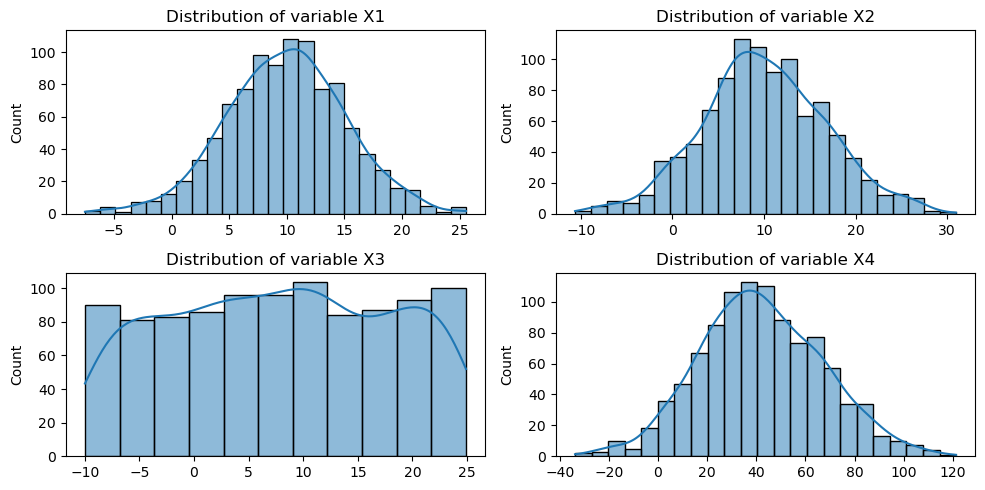

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))

sns.histplot(data=X1, ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Distribution of variable X1')

sns.histplot(data=X2, ax=axs[0, 1], kde=True)
axs[0, 1].set_title('Distribution of variable X2')

sns.histplot(data=X3, ax=axs[1, 0], kde=True)
axs[1, 0].set_title('Distribution of variable X3')

sns.histplot(data=X4, ax=axs[1, 1], kde=True)
axs[1, 1].set_title('Distribution of variable X4')

plt.tight_layout()
plt.show

### Part 3: Describe the data

In [4]:
# Define the function that summarizes the dataset
def describe(data):
    statistics = []

    for var_name, values in data.items():
        mean = np.mean(values)
        median = np.median(values)
        mode = stats.mode(values)
        std_dev = np.std(values)
        rnge = np.max(values) - np.min(values)
    
        statistics.append({
            'Variable': var_name,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Range': rnge
        })

    # Create a DataFrame
    stats_df = pd.DataFrame(statistics)
    return stats_df

In [5]:
# Prepare the dataset with 4 variables
X_df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'X4': X4
})

describe(X_df)

,Variable,Mean,Median,Mode,Standard Deviation,Range
0,X1,9.906158,10.037882,"(-7.538008175573868, 1)",5.164463,33.100840
1,X2,9.989261,9.687811,"(-10.647365225231908, 1)",6.770594,41.632897
2,X3,7.836231,8.130248,"(-9.991143653888047, 1)",10.065918,34.899248
3,X4,41.943866,41.211679,"(-33.761218289825, 1)",25.010382,155.096363


### Part 4: Data split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Define the function to split the data 
def data_split(X, Y):
    X_train_val, X_test, Y_train_val, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=999)
    X_train, X_val, Y_train, Y_val = train_test_split(
        X_train_val, Y_train_val, test_size=0.25, random_state=999)
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [8]:
# Split the data
X = X_df[['X1', 'X2', 'X3']]
Y = X_df['X4']

X_train, X_val, X_test, Y_train, Y_val, Y_test = data_split(X, Y)

In [9]:
# Display the datasets
data_model = {
    'Training': (X_train, Y_train),
    'Validation': (X_val, Y_val),
    'Testing': (X_test, Y_test)
}

for name, (X_data, Y_data) in data_model.items():
    df = X_data.copy()
    df['X4'] = Y_data.values
    print(f'\n{name} data set:')
    print(df)
    print('-'*50)


Training data set:
            X1         X2         X3         X4
37   12.402611  13.815084  23.088723  43.161751
621  10.815394  10.014517  -9.975557  61.649895
734  16.536450   8.347054  -7.679433  65.793496
70    4.926742  15.826899  19.907311  37.426869
562   4.891251   3.803052   8.345506  12.846154
..         ...        ...        ...        ...
647  22.360810   7.238095  -3.817666  70.253571
372  12.316654  11.804405  10.247631  49.798892
29    7.955481  19.254090  18.540941  55.132291
836  10.624561  10.738576  13.615381  39.849469
965  -0.187314  12.705141  -8.143616  45.884412

[600 rows x 4 columns]
--------------------------------------------------

Validation data set:
            X1         X2         X3         X4
17   18.004358  11.471325  13.336074  57.086617
716   2.285038  15.815436   9.797119  42.219264
250  12.459203  14.577030   2.284715  66.364782
293   7.984893  18.303601  -7.900405  78.780994
237   4.785867  10.713610  20.450068  21.262498
..         ...     

### Part 5: Build your first model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [11]:
def regression_model(data):
    # Unpack the data from the dictionary
    X_train, Y_train = data['Training']
    X_val, Y_val = data['Validation']
    X_test, Y_test = data['Testing']
    
    # Build the linear regression model on the training set
    linear_model = LinearRegression()
    linear_model.fit(X_train, Y_train)

    # Validate the model on the validation set
    Y_val_pred = linear_model.predict(X_val)
    mse_val = mean_squared_error(Y_val, Y_val_pred)
    r_squared_val = r2_score(Y_val, Y_val_pred)

    print('Mean Squared Error (using validation set):', mse_val)
    print('R-squared (using validation set):', r_squared_val)
    print('-'*50)

    # Report performance on the test set
    Y_test_pred = linear_model.predict(X_test)
    mse_test = mean_squared_error(Y_test, Y_test_pred)
    r_squared_test = r2_score(Y_test, Y_test_pred)

    print('Mean Squared Error (using test set):', mse_test)
    print('R-squared (using test set):', r_squared_test)
    print('-'*50)

In [12]:
regression_model(data_model)

Mean Squared Error (using validation set): 2.165204399189995e-28
R-squared (using validation set): 1.0
--------------------------------------------------
Mean Squared Error (using test set): 2.173013505854101e-28
R-squared (using test set): 1.0
--------------------------------------------------
